# <center>  Ford GoBike Trip Data Visualization for 2018 </center>
  
### by Rishindra Mani Katiyar
> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

>Over the past decade, bicycle-sharing systems are growing in variety and recognition in cities across the globe. Bicycle-sharing systems enable users to rent bicycles for brief visits, usually half-hour or less. Thanks to the increase in info technologies, it's simple for a user of the system to access a dock at intervals the system to unlock or come bicycles.

## Preliminary Data Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

I saved the csv files for each month in 2018 from the FordGoBike website in folder named **2018_dataset**
  
I then used the glob and os modules to store, load, and combine the files into one new file named **Ford_GoBike_data.csv**.Code used for combining all .csv files into one:

>folder_name = '2018_dataset'  
>frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
>df = pd.concat(frames, ignore_index=True)  
>df.to_csv('Ford_GoBike_data.csv', index=False)

In [2]:
df = pd.read_csv('Ford_GoBike_data.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [3]:
#checking for numbers of rows and columns
df.shape

(1863721, 14)

In [4]:
# columns and rows information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [5]:
#checking for duplicate items
df.duplicated().sum()

0

In [6]:
#checking for null values
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [7]:
print(df. user_type.unique())
print(df.bike_share_for_all_trip.unique())

['Subscriber' 'Customer']
['No' 'Yes']


After performing operations to inspect the data,we can conclude that the data :

* Does have missing or null values
* Does not have duplicates

## Data Cleaning

After Inspection I would like to,
* Drop columns that are not important to this analysis
* Change incorrect datatypes
* Add new columns

In [8]:
#Drop columns that are not important to this analysis
df.dropna(inplace=True)

In [9]:
#Change incorrect datatypes
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [10]:
#Add new columns
df['start_month'] = df['start_time'].dt.strftime('%B')
df['start_weekday'] = df['start_time'].dt.strftime('%a')

df['start_hour'] = df['start_time'].dt.hour
df['duration_min'] = df['duration_sec']/60

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,January,Wed,22,1254.733333
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,January,Wed,16,1423.700000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,January,Wed,14,1192.933333
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,January,Wed,14,1017.933333
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,January,Wed,19,666.100000


In [12]:
df.shape

(1851950, 18)

In [13]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863720
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1851950 non-null  int64         
 1   start_time               1851950 non-null  datetime64[ns]
 2   end_time                 1851950 non-null  datetime64[ns]
 3   start_station_id         1851950 non-null  float64       
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1851950 non-null  float64       
 6   start_station_longitude  1851950 non-null  float64       
 7   end_station_id           1851950 non-null  float64       
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1851950 non-null  float64       
 10  end_station_longitude    1851950 non-null  float64       
 11  bike_id                  1851950 non-null  int64         
 12  

In [14]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_hour,duration_min
count,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06
mean,8.529994e+02,1.196744e+02,3.776904e+01,-1.223521e+02,1.181730e+02,3.776917e+01,-1.223515e+02,2.284911e+03,1.350753e+01,1.421666e+01
std,2.339450e+03,1.003976e+02,1.007719e-01,1.186128e-01,1.004403e+02,1.006298e-01,1.180515e-01,1.283036e+03,4.742066e+00,3.899084e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,0.000000e+00,1.016667e+00
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224116e+02,3.000000e+01,3.777143e+01,-1.224099e+02,1.216000e+03,9.000000e+00,5.833333e+00
50%,5.550000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.327000e+03,1.400000e+01,9.250000e+00
75%,8.700000e+02,1.860000e+02,3.779728e+01,-1.222894e+02,1.830000e+02,3.779728e+01,-1.222914e+02,3.312000e+03,1.700000e+01,1.450000e+01
max,8.636600e+04,3.810000e+02,3.788022e+01,-1.218333e+02,3.810000e+02,3.788022e+01,-1.218333e+02,6.234000e+03,2.300000e+01,1.439433e+03


### What is the structure of your dataset?

The dataset was originally made up of 1863721 rows and 14 columns. After cleaning,dropping null rows and adding new columns, the dataset now consist of 1851950 rows and 18 columns.
>The variables are as follows:
>* Trip Duration (seconds)
>* Start Time and Date
>* End Time and Date
>* Start Station ID
>* Start Station Name
>* Start Station Latitude
>* Start Station Longitude
>* End Station ID
>* End Station Name
>* End Station Latitude
>* End Station Longitude
>* Bike ID
>* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
>* Bike share for all trip
 
I have added the following columns:
>* Start_month                 
>* Start_weekday                  
>* Start_hour                                          
>* Duration_min 


### What is/are the main feature(s) of interest in your dataset?

>* User type
>* Trip Duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>* Trip Duration (seconds)
>* Start Time and Date
>* End Time and Date

## Univariate Exploration

> In this section, investigation of distribution of individual variables is done. If
there are unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [15]:
df.user_type.value_counts() 

Subscriber    1574991
Customer       276959
Name: user_type, dtype: int64

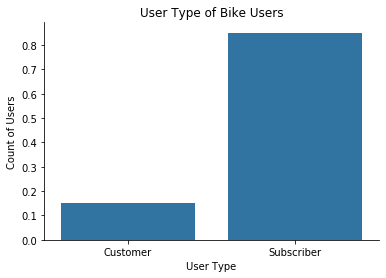

In [16]:
# User Type of Bike Users
users =df.groupby('user_type').size()/df.shape[0]
base_color = sb.color_palette()[0]
sb.barplot(users.index.values, users, color = base_color)
plt.title('User Type of Bike Users')
plt.xlabel('User Type')
plt.ylabel('Count of Users')
sb.despine();

>From the visualization above, we can see that 85% of Ford GoBike users are Subscribers, While 15%are users are Customers.This means that most Ford GoBike users in 2018 are Subscribers.

In [17]:
df.bike_share_for_all_trip.value_counts()

No     1690457
Yes     161493
Name: bike_share_for_all_trip, dtype: int64

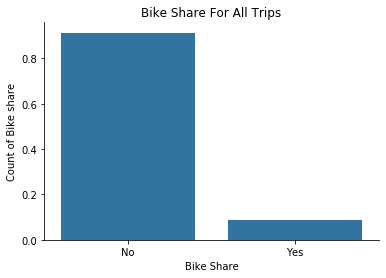

In [18]:
# Bike Share For All Trips
bike_share =df.groupby('bike_share_for_all_trip').size()/df.shape[0]
base_color = sb.color_palette()[0]
sb.barplot(bike_share.index.values, bike_share, color = base_color)
plt.title('Bike Share For All Trips')
plt.xlabel('Bike Share')
plt.ylabel('Count of Bike share')
sb.despine();

>From the visual above, we can see that 91% of Ford GoBike users did not share their bike for all trip, While 8%are users share their bike. This means that most Ford GoBike users in 2018 ride all alone.

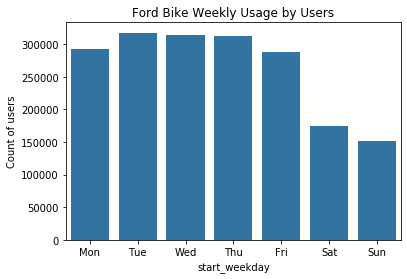

In [19]:
# Ford Bike Weekly Usage by Users
base_color = sb.color_palette()[0]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(x='start_weekday',data=df,color=base_color, order=weekday)
plt.title('Ford Bike Weekly Usage by Users')
plt.ylabel('Count of users');

>From the visualization above, we can see that in 2018 
>* Tuesday has the highest number of users followed by Wednesday and Thursday.
>* Saturday and Sunday has the lowest number of users.
>* Monday to Friday has above 250000 users.
>* This means that most users use ford bike mostly on weekdays for commuting purposes during working days. 

In [20]:
df.start_month.value_counts()

October      200102
July         196038
June         193907
August       189250
September    184635
May          179125
November     133651
December     131171
April        131169
March        111382
February     106718
January       94802
Name: start_month, dtype: int64

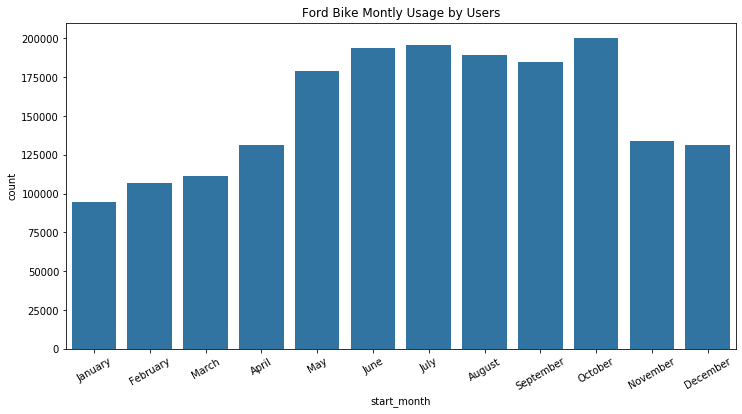

In [21]:
# Ford GoBike Montly Usage by Users
base_color = sb.color_palette()[0]
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
         'September', 'October', 'November', 'December']
plt.figure(figsize=(12,6))
sb.countplot(x='start_month',data=df,color=base_color,order=month)
plt.xticks(rotation=30)
plt.title('Ford Bike Montly Usage by Users');

> From the visualization above, we can see that:
>* October has the highest number of usage, followed by July then June, August,September.
>* This mean that Ford bike users mostly make use of the bikes during summer which makes sense because Weather conditions have a significant effect on the bicycle Sharing system.

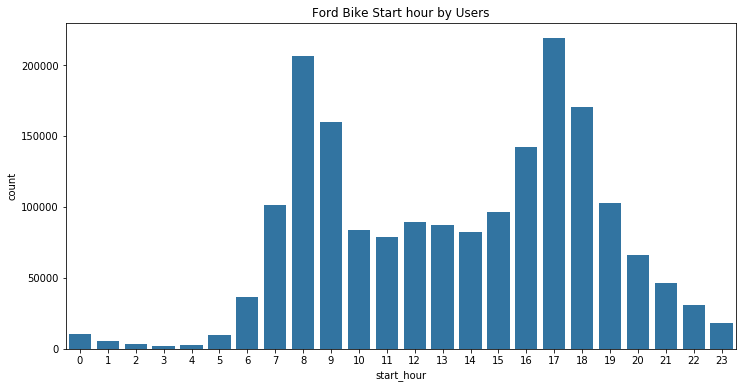

In [22]:
# Ford GoBike Start hour by Users
base_color = sb.color_palette()[0]
plt.figure(figsize=(12,6))
sb.countplot(x='start_hour',data=df,color=base_color)
plt.title('Ford Bike Start hour by Users');

>From the visualization above, we can see that:
>* Most user use the bike sharing system in the morning around 8am-9am and in the evening around 5pm-6pm.
>* This could mean that the rush hour of the bike sharing system is between 8am-9pm and 5pm-6pm which makes sense because that is when people resume work in the US.
>* The bike is primarily used as a means of transportation to work by users.

In [23]:
df.duration_min.describe()

count    1.851950e+06
mean     1.421666e+01
std      3.899084e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.250000e+00
75%      1.450000e+01
max      1.439433e+03
Name: duration_min, dtype: float64

In [24]:
df.duration_min.mean()

14.21665616422384

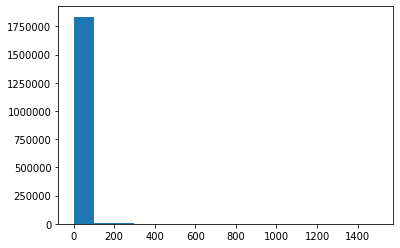

In [25]:
bin_edges = np.arange(0, df['duration_min'].max()+100, 100)
plt.hist(data = df, x = 'duration_min', bins = bin_edges);

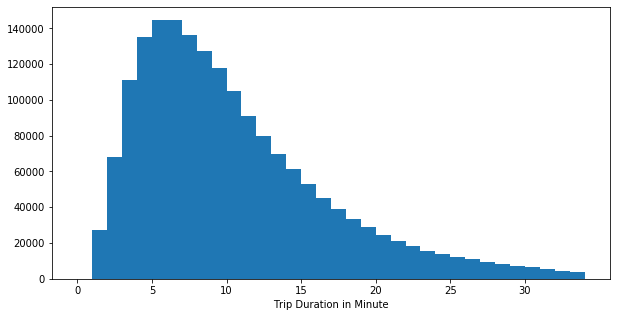

In [26]:
# Trip Duration in Minute
bins_edges = np.arange(0, 35, 1)
ticks = np.arange(0, 35, 5)
plt.figure(figsize = [10, 5])
plt.hist(data=df, x='duration_min', bins=bins_edges);
plt.xticks(ticks, ticks)
plt.xlabel('Trip Duration in Minute');


> From the visualization above, we can see that
>* Most trips are between 4 to 10minutes.
>* The average trip takes up to 14 minutes.
>* Users only use the Ford bike sharing system for short trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For user type:
>* we can see that 85% of Ford GoBike users are Subscribers, While 15%are users are Customers.This means that most Ford GoBike users in 2018 are Subscribers.

>For bike for all trip variable:
>* 91% of Ford GoBike users did not share their bike for all trip, While 8%are users share their bike. This means that most Ford GoBike users in 2018 ride all alone.

> For start weekday variable:
>* Tuesday has the highest number of users followed by Wednesday and Thursday.Saturday and Sunday has the lowest number of users.
>* Monday to Friday has above 250000 users.

>For start month variable:
>* October has the highest number of usage, followed by July then June, August,September.
>* This mean that Ford GoBike users mostly make use of the bikes during summer which makes sense because weather conditions have a significant effect on the bicycle Sharing system.

> For start hour variable:
>* Most user use the bike sharing system in the morning around 8am-9am and in the evening around 5pm-6pm.
>* This could mean that the rush hour of the bike sharing system is between 8am-9pm and 5pm-6pm which makes sense because that is when people resume work in the US.

> For duration minutes variable:
>* Most trips are between 4 to 10minutes.
>* The average trip takes up to 14 minutes.
>* Users only use the Ford GoBike sharing system for short trips.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During visualization, the duration minutes variable distribution was not clear. so I performed an operation using Xticks() while plotting which makes the distribution more clearer.

## Bivariate Exploration

> In this section, I investigated the relationships between pairs of variables in the
data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

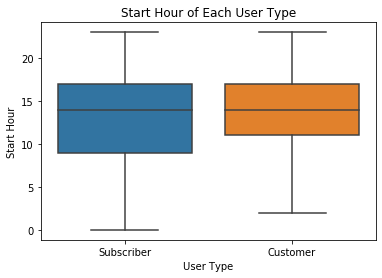

In [27]:
#Start Hour of Each User Type
sb.boxplot(data=df, x='user_type', y='start_hour',showfliers=False);
plt.title('Start Hour of Each User Type')
plt.xlabel('User Type');
plt.ylabel('Start Hour');

>Though no difference, Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon than Customers .

In [28]:
df.groupby('user_type')['duration_min'].mean()

user_type
Customer      31.971642
Subscriber    11.094478
Name: duration_min, dtype: float64

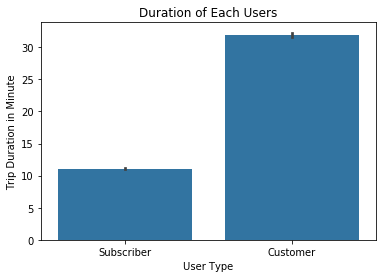

In [29]:
#comparing user type and duration variable
sb.barplot(data=df, x='user_type', y='duration_min', color=base_color)
plt.title('Duration of Each Users');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

>From the visualization above, we see that customers who are just 15% of users generally rented the bikes for longer period while Subscribers mostly use the bike for short trip.

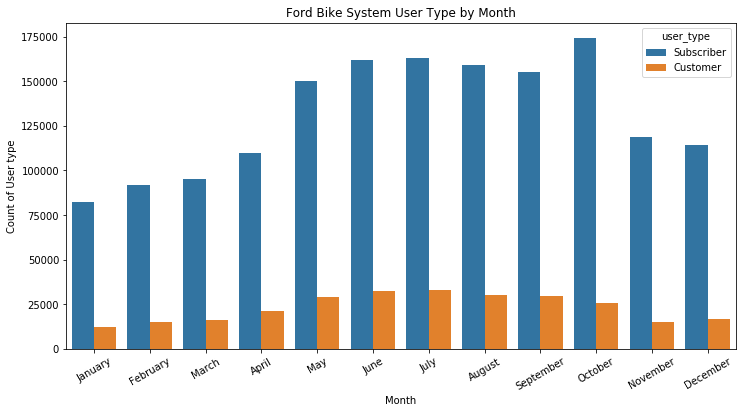

In [30]:
#relationship between start month and user type
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_month', hue='user_type',order=month);
plt.xticks(rotation=30);
plt.title('Ford Bike System User Type by Month')
plt.xlabel('Month');
plt.ylabel('Count of User type');

>From the above visualization, we can see that;
>* Customers demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who comes for visit .
>* Subscriber highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders who uses the bike to transport themselves to work.

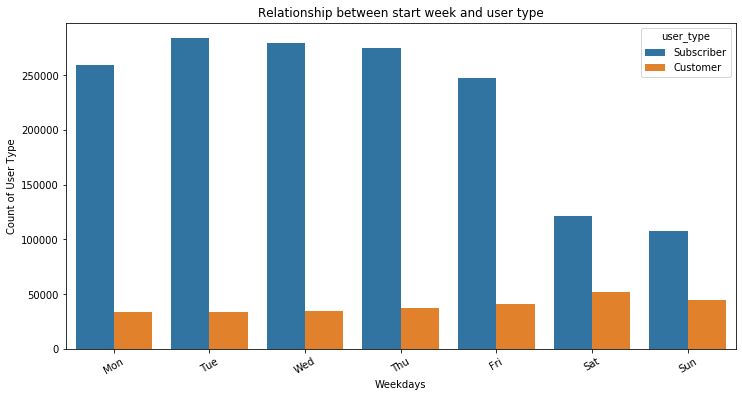

In [31]:
#relationship between start week and user type
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_weekday', hue='user_type',order=weekday);
plt.xticks(rotation=30)
plt.title('Relationship between start week and user type');
plt.xlabel('Weekdays');
plt.ylabel('Count of User Type');

>We can see from the visualization above that;
>* Customers have a relatively low usage of the bike share system during week days but has a high usage during weekends. 
>* Subscribers are the opposite, there is high usage on weekdays but low usage on weekends.

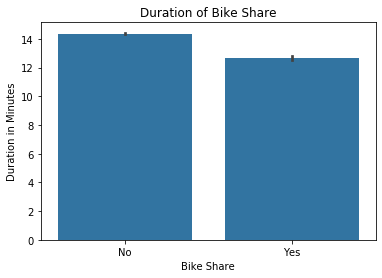

In [32]:
#relatinship between bike share and duration
sb.barplot(data=df, x= 'bike_share_for_all_trip', y='duration_min',color=base_color);
plt.title('Duration of Bike Share')
plt.xlabel('Bike Share');
plt.ylabel('Duration in Minutes');

>The duration of time for bike that was not shared for all trip is more than bike that was shared for all trip 

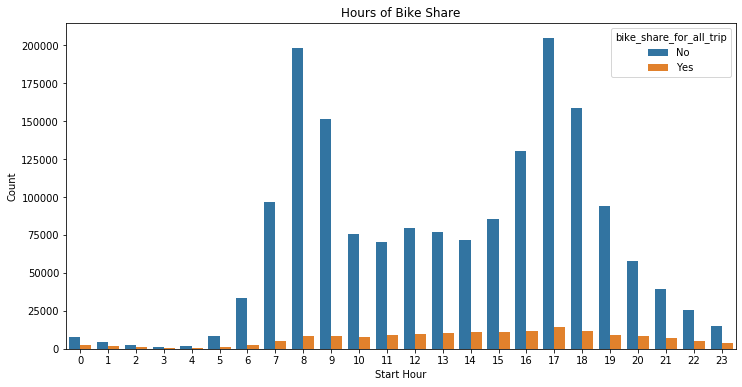

In [33]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_hour', hue='bike_share_for_all_trip')
plt.title('Hours of Bike Share')
plt.xlabel('Start Hour');
plt.ylabel('Count');

>Though not a huge difference, users that do not share their bike have rush hour mostly between 8-9am in the morning and 5pm-6pm in the evening. while users that share their bikes have their rush hour mostly in the afternoon and evening.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Relationship between User type and duration of trip shows that customers generally rented the bikes for longer period while Subscribers mostly use the bike for short trip.This could mean that customers are casual riders such as tourists or users who just ride for leisure during afternoon or early evenings on weekends.Subscribers use the bike sharing system as a means of transport to work on weekdays (Mon-Fri) and especially during rush hours. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>* Subscribers has high usage on weekdays and low usage on weekends while customers has high usage on weekends and low usage during weekdays.
>* Most trips was taken between 8am and 9am in the morning and between 5pm and 6pm in the evening.
>* The highest trip taken in days of the week was on tuesday.
>* The highest trip taken in the month of the year was on October

## Multivariate Exploration
> Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.
  
In this section, I created plots of three or more variables to investigate data further. 

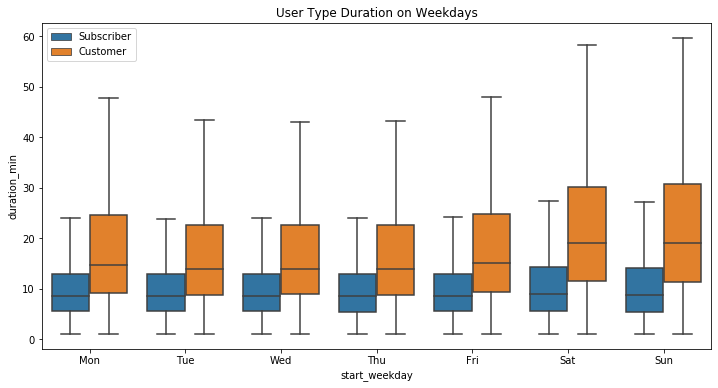

In [34]:
#User Type Duration on Weekdays
plt.figure(figsize=(12,6))
sb.boxplot(x="start_weekday", y="duration_min", hue="user_type",data=df,showfliers=False,order=weekday)
plt.title('User Type Duration on Weekdays')
plt.legend(loc = 'upper left');

>We can see from the above visualization that Customers use ford bike sharing system bikes for long from mondays to sundays while Subscribers mostly use the bike for short trip on Mondays to sundays

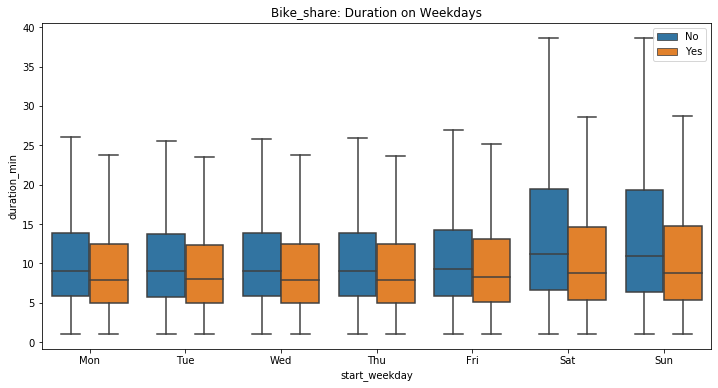

In [35]:
#Relationship between bike share, duration ansd weekdays
plt.figure(figsize=(12,6))
sb.boxplot(x="start_weekday", y="duration_min", hue="bike_share_for_all_trip",data=df,showfliers=False,order=weekday)
plt.title('Bike_share: Duration on Weekdays')
plt.legend(loc = 'upper right');

>We can see from the above visualization that Users who do not share their bike for all trip spend tend to use the bike for longer periods while users who share their bikes use the bike sharing syatem for short trip.

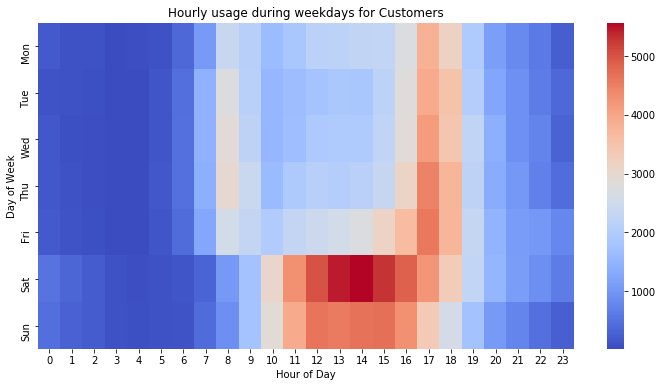

In [36]:
#Hourly usage during weekdays for customers
weekcat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_weekday'] = df['start_weekday'].astype(weekcat)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
plt.figure(figsize=(12,6))
sb.heatmap(ct_counts, cmap='coolwarm');
plt.title('Hourly usage during weekdays for Customers');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


>* Customers makes use of the bike sharing system heavily on Weekends between the hours of 11am and 5pm from saturday to sunday and lightly on weekdays from 5pm to 6pm, Monday to friday .
>* The rush hour for the bike sharing syatem was on saturday from 1pm to 3pm.

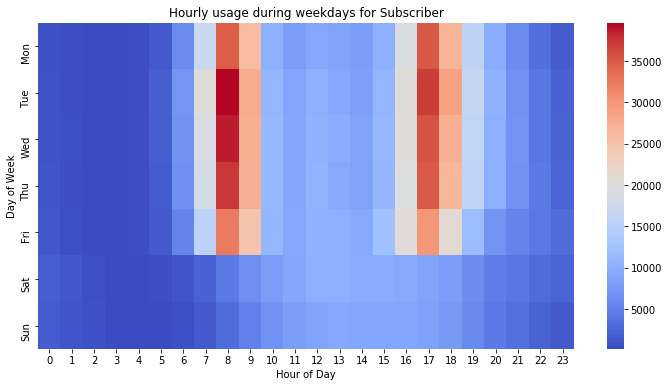

In [37]:
#Hourly usage during weekdays for Subscriber
customers = df.query('user_type == "Subscriber"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
plt.figure(figsize=(12,6))
sb.heatmap(ct_counts, cmap='coolwarm');
plt.title('Hourly usage during weekdays for Subscriber');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


>* Subscribers makes use of the bike sharing system heavily on Weekdays between the hours of 8am and 9am in the morning and 5pm-6pm in the evening from Monday to Friday.
>* The rush hour for the bike sharing system was 8am in the morning and 5pm in the afternoon.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section essentially amplified the previous data topics of exploration through different visuals and adding in more variables compared to bivarate exploration and univarate exploration.Subscribers makes use of the bike sharing system heavily on Weekdays between the hours of 8am and 9am in the morning and 5pm-6pm in the evening from Monday to Friday because the bike sharing sytem is used as a means of transport to work for those periods.Customers makes use of the bike sharing system heavily on Weekends between the hours of 11am and 5pm from saturday to sunday and lightly on weekdays from 5pm to 6pm, Monday to friday because they are mostly tourists or visitors.

### Were there any interesting or surprising interactions between features?

>There are no suprising interaction between features out of the ordinary. Interactions between features supplement each other and quite make sense when looked at combined.